In [13]:
from deepface import DeepFace
import os
from PIL import Image
import numpy as np
import cv2

## Protocol

***

All subjects were instructed to do following expressions:

* neutral
* happiness
* sadness
* surprise
* fear
* anger
* disgust
* contempt
* 2 random expressions except those above (such as tiredness, envy, calmness, love, boredom, etc.)

For each expression were acquired multiple images and from those was chosen one image from each expression and for disgust and contempt were extracted 2 images (due to lack of those categories in other databases). For all subject were overall chosen 12 images. Expressions were acquired from 15<strong style="color: red;">TODO</strong> subjects which makes 180 images, however some images had insufficient expression so total number is <strong style="color: red;">TODO</strong>. All subjects were Caucasian race in age range of 21-60 and their gender was 8 women, 7 men <strong style="color: red;">TODO</strong>.

Images were acquired from NIR camera [TP-LINK Tapo C500](https://www.tp-link.com/en/home-networking/cloud-camera/tapo-c500/) with 1080p resolution.

Images were subsequently processed by *RetinaFace* face detector (including detection and face alignment) mediated by [deepface framework](https://github.com/serengil/deepface) to 224x224 images. Then annotated categorically and spatially (Circumplex Model of Affect) using [annotator](https://gitlab.fit.cvut.cz/vadlemar/real-time-facial-expression-recognition-in-the-wild/-/blob/master/src/Custom_Test_Set_160/annotator_gui_EN.py?ref_type=heads) from original work.

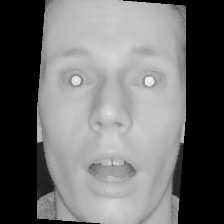

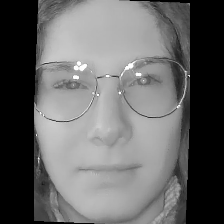

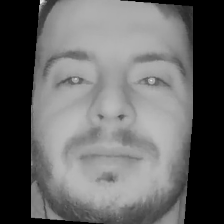

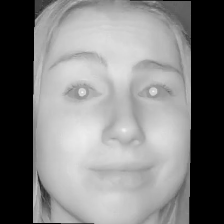

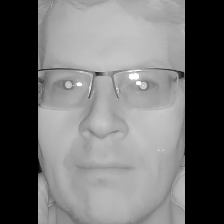

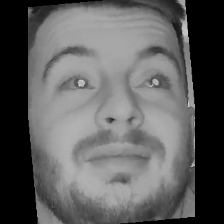

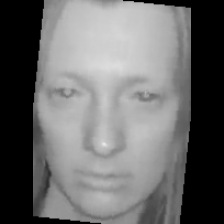

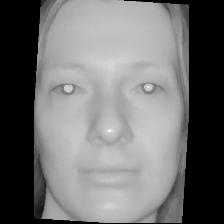

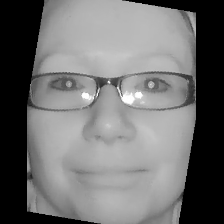

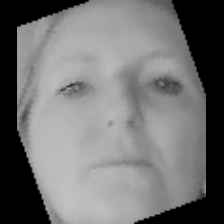

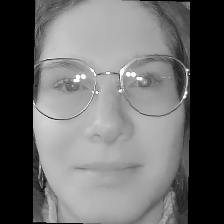

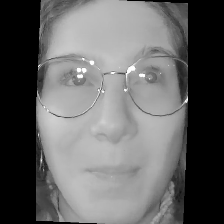

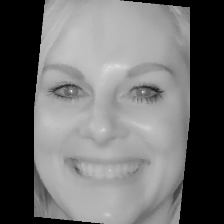

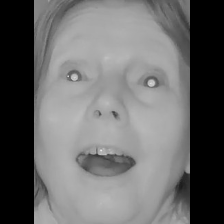

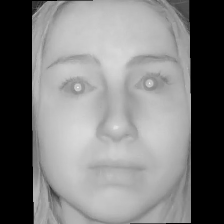

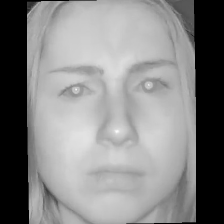

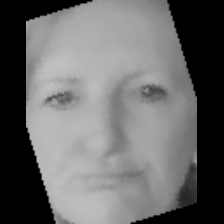

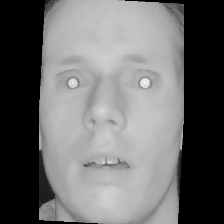

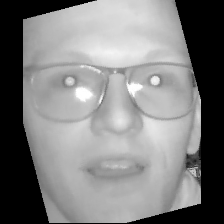

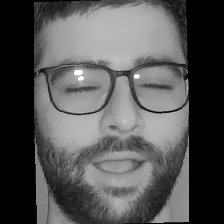

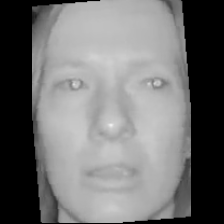

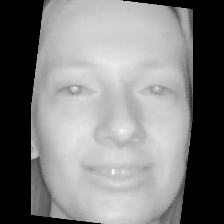

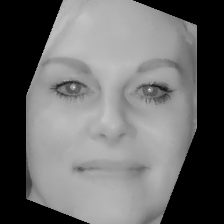

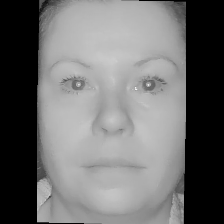

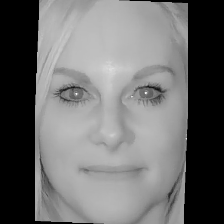

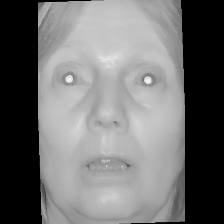

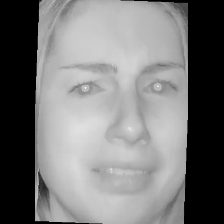

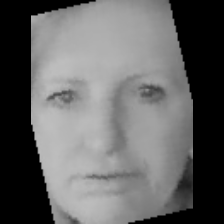

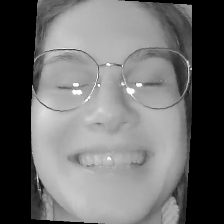

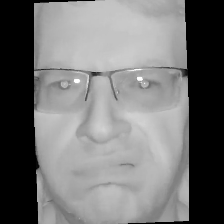

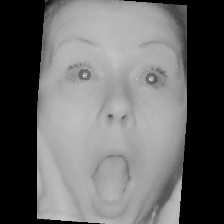

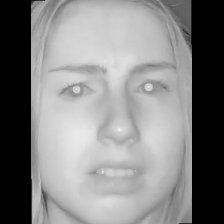

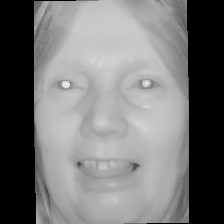

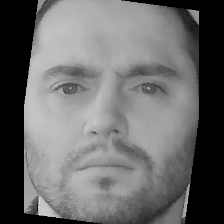

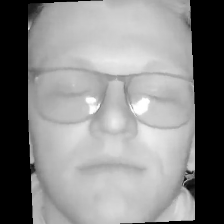

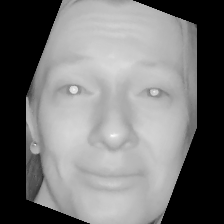

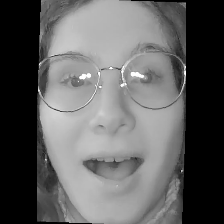

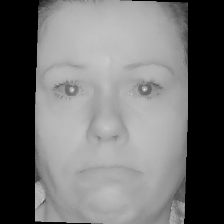

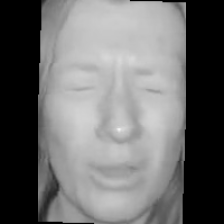

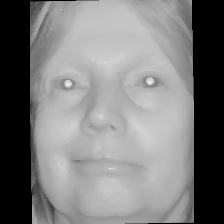

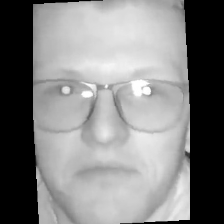

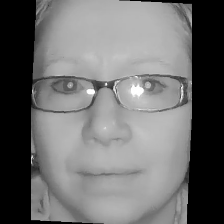

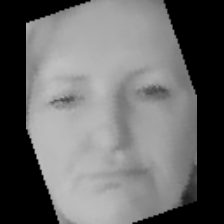

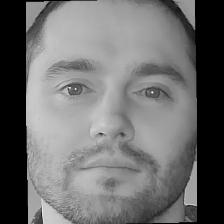

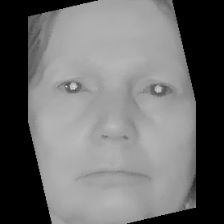

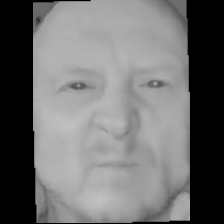

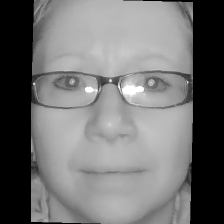

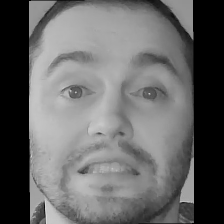

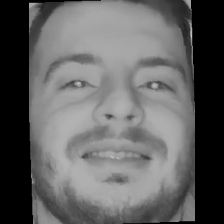

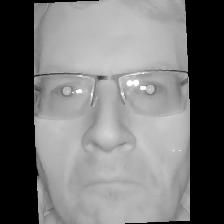

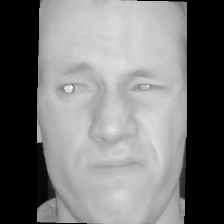

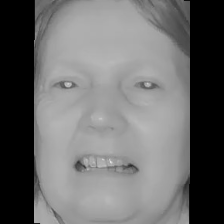

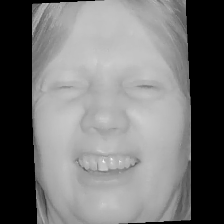

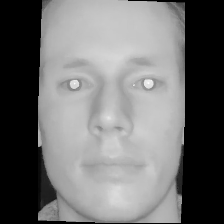

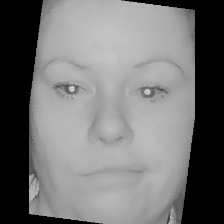

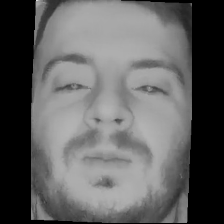

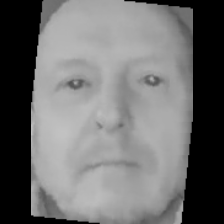

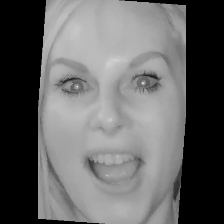

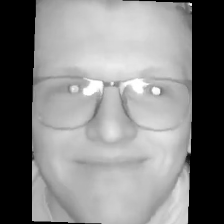

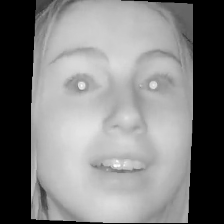

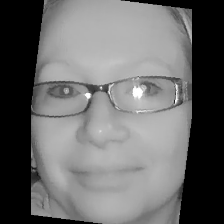

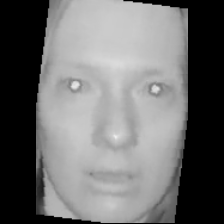

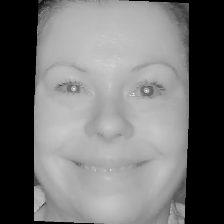

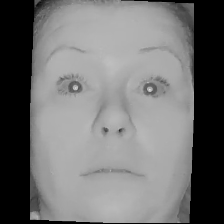

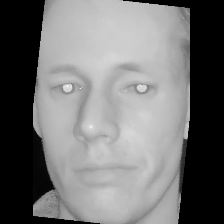

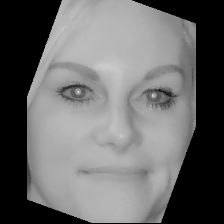

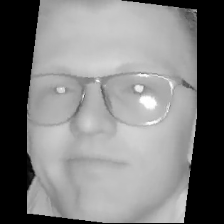

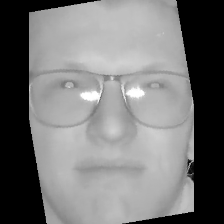

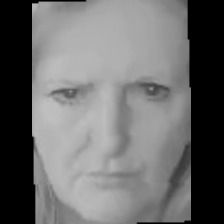

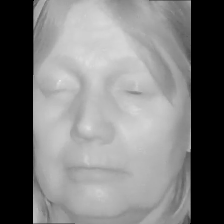

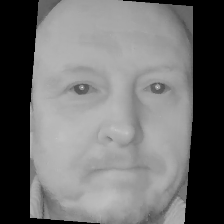

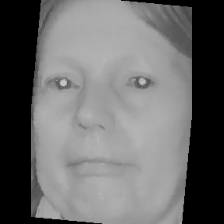

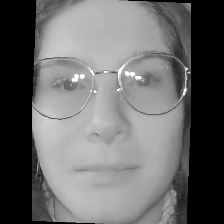

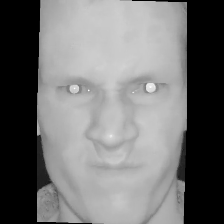

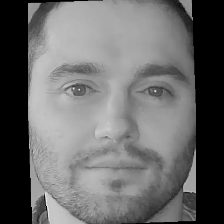

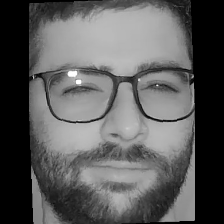

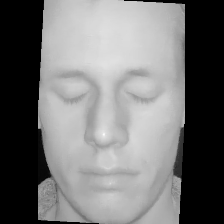

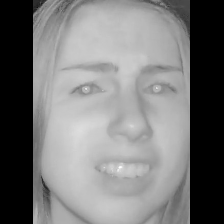

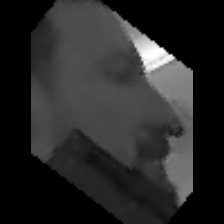

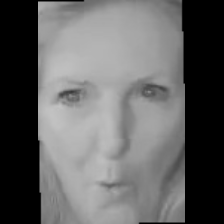

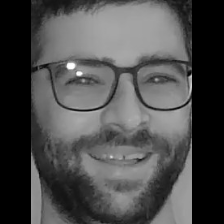

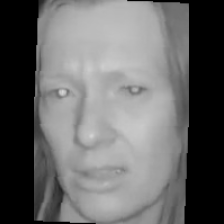

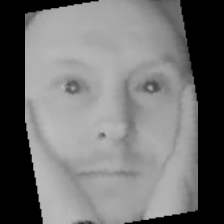

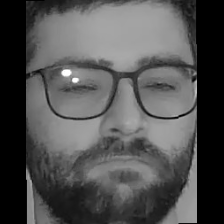

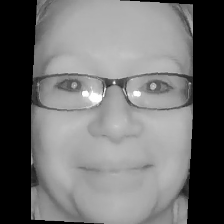

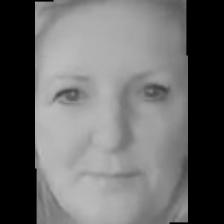

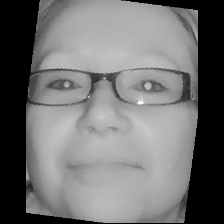

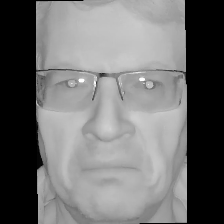

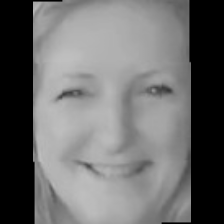

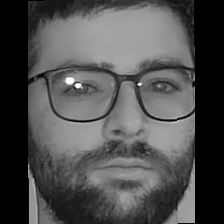

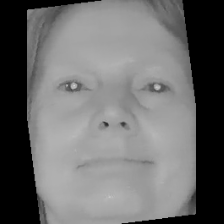

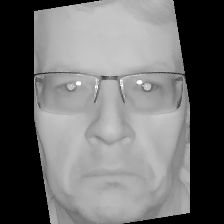

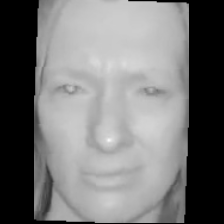

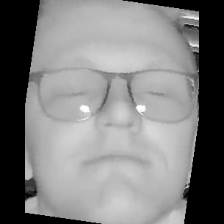

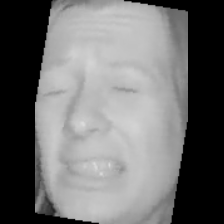

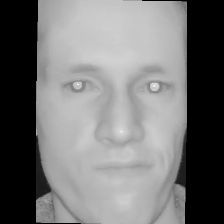

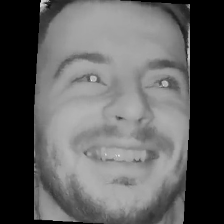

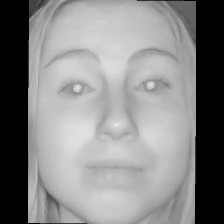

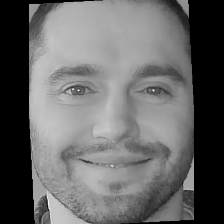

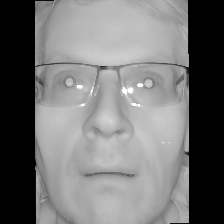

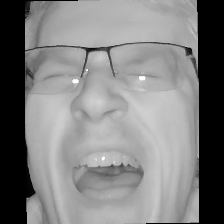

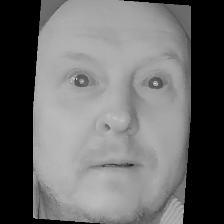

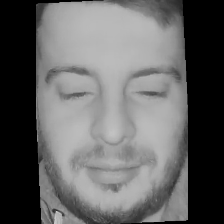

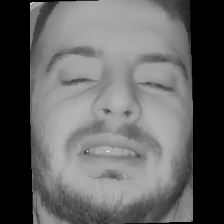

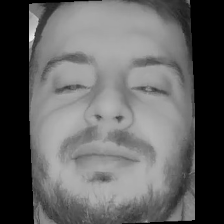

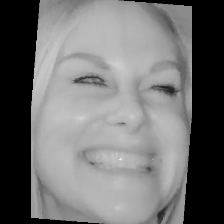

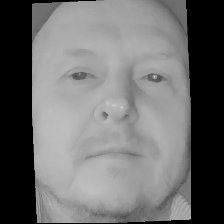

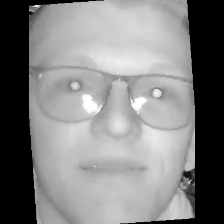

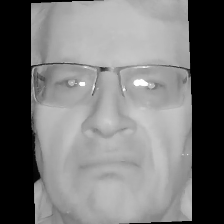

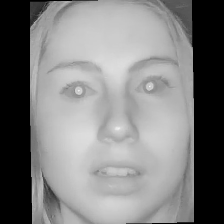

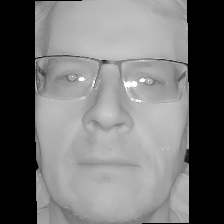

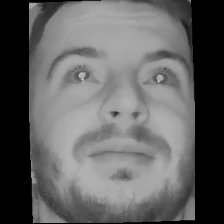

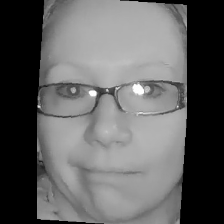

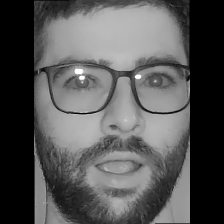

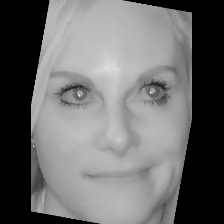

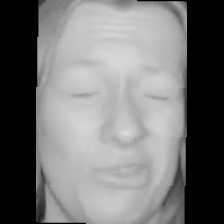

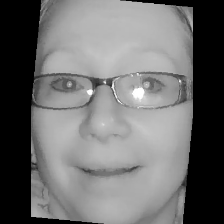

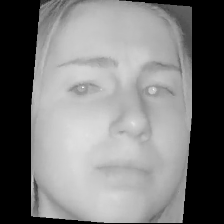

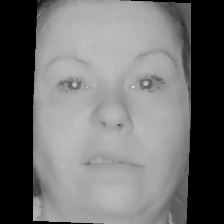

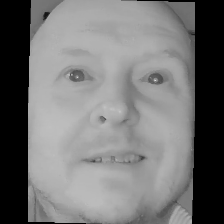

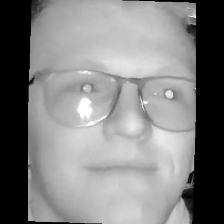

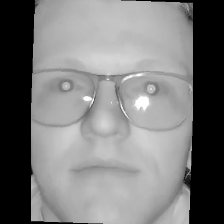

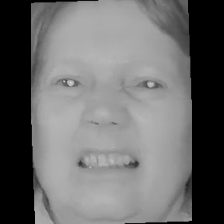

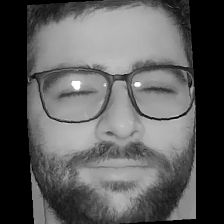

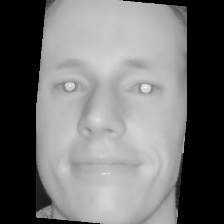

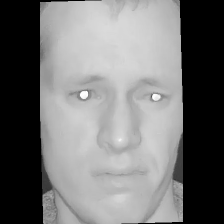

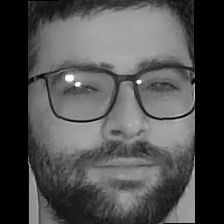

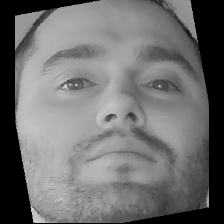

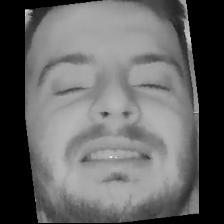

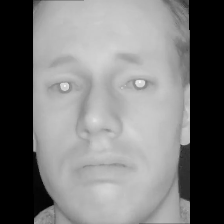

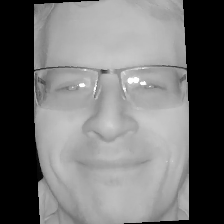

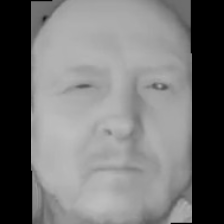

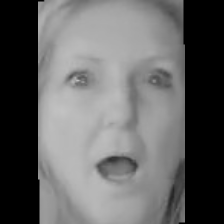

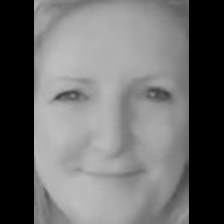

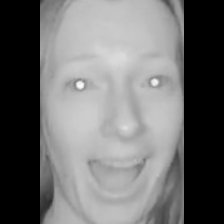

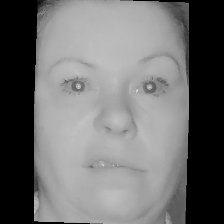

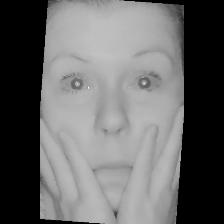

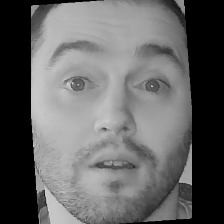

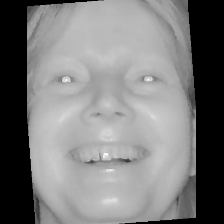

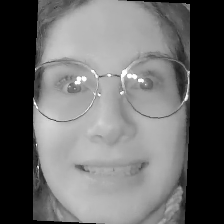

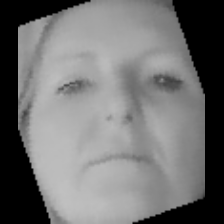

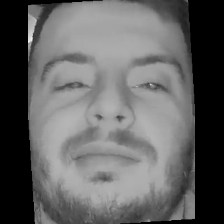

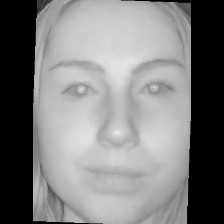

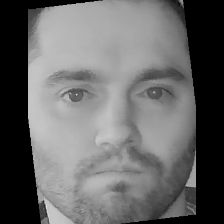

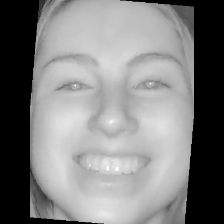

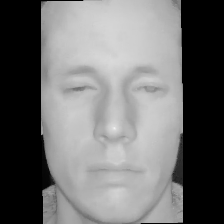

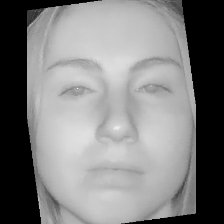

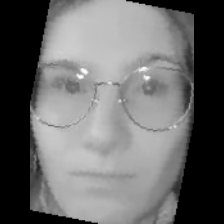

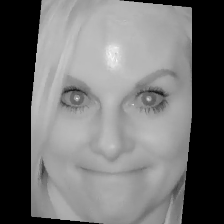

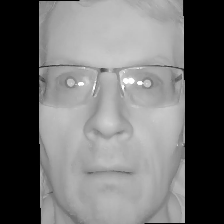

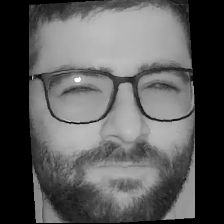

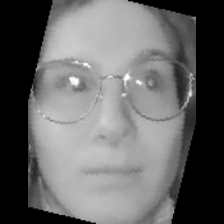

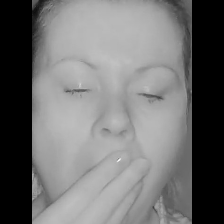

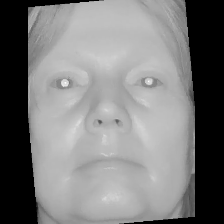

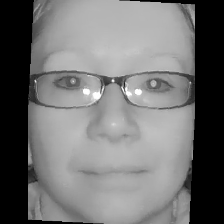

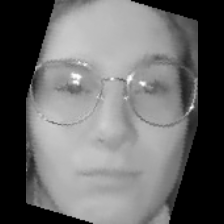

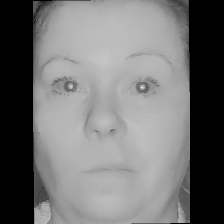

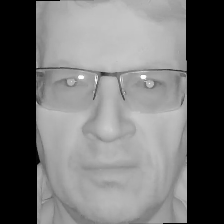

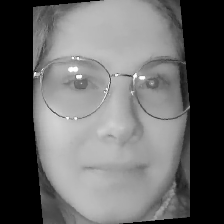

In [80]:
pth = "custom_all_filtered"
trgt_pth = 'custom_nir'

fn = os.listdir(pth)
os.makedirs(trgt_pth, exist_ok=True)

for f in fn:
    face_obj = DeepFace.extract_faces(
                        str(os.path.join(pth,f)),
                        detector_backend="retinaface",
                        align=True
                      )
    face = (face_obj[0]['face'] * 255).astype(np.uint8)
    display(Image.fromarray(face))
    
    trgt_fp = str(os.path.join(trgt_pth,f))
    
    cv2.imwrite(trgt_fp, face)

In [76]:
import os
import pandas as pd

fns = os.listdir('custom_all_filtered')

custom_nir = pd.DataFrame({'filename': fns, 'gender': 'male', 'race': 'cauca', 'adult': 'yes'})

# List of IDs for which gender should be 'female'
female_ids = [3,4,7,8,10,12,13,15]

# Get filenames
fns = os.listdir('custom_all_filtered')

# Create DataFrame
custom_nir = pd.DataFrame({'filename': fns, 'gender': 'male', 'race': 'cauca', 'adult': 'yes'})

# Set gender based on filename
custom_nir['gender'] = custom_nir['filename'].apply(lambda x: 'female' if int(x.split('-')[0]) in female_ids else 'male')

# Sort DataFrame by filenames
custom_nir = custom_nir.sort_values(by='filename', ignore_index=True)


In [79]:
custom_nir.head(1)

filename gender   race adult
0  1-0-neutral.jpg   male  cauca   yes

In [78]:
custom_nir.to_csv('custom_nir-filenames.csv')